# Second Euler Case

In [105]:
reset -f

In [106]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Math, Latex

## Define symbolic variables

In [107]:
L, F, x, E, Iz  = sp.symbols('L, F, x, E, I_z', real = 'True', positive = 'True')
Mbz = sp.Function('M_{bz}')
v = sp.Function('v')

lam = sp.symbols('lambda', real = 'True', positive = 'True')

## Get internal forces

In [108]:
eq = sp.Eq(0, -Mbz(x) - v(x)*F)

In [109]:
sol = sp.solve(eq, Mbz(x))
Mbz = sol[0]
Mbz

-F*v(x)

## Deformation equation

In [110]:
DefEq = sp.Eq(sp.Derivative(v(x),x,x), Mbz/(E*Iz)) 
display(DefEq)

Eq(Derivative(v(x), (x, 2)), -F*v(x)/(E*I_z))

classifying the equation:
* ordinary 
* linear
* second orden
* inhomogeneous
* constant coefficients

we need an ODE solver-> sp.dsolve()

## Solve the ODE

In [111]:
sol = sp.dsolve(DefEq)
v = sol.rhs
dvdx = sp.diff(sol.rhs, x)
v

C1*sin(sqrt(F)*x/(sqrt(E)*sqrt(I_z))) + C2*cos(sqrt(F)*x/(sqrt(E)*sqrt(I_z)))

## Boundary conditions to set up equation system

In [112]:
BC1 = sp.Eq(0, v.subs(x,0))
BC2 = sp.Eq(0, v.subs(x, L))

display(BC1)
display(BC2)

Eq(0, C2)

Eq(0, C1*sin(sqrt(F)*L/(sqrt(E)*sqrt(I_z))) + C2*cos(sqrt(F)*L/(sqrt(E)*sqrt(I_z))))

## Coefficient matrix

In [113]:
CoeffMat = sp.Matrix([[BC1.rhs.coeff('C1'), BC1.rhs.coeff('C2')],
                      [BC2.rhs.coeff('C1'), BC2.rhs.coeff('C2')]])
CoeffMat

Matrix([
[                                 0,                                  1],
[sin(sqrt(F)*L/(sqrt(E)*sqrt(I_z))), cos(sqrt(F)*L/(sqrt(E)*sqrt(I_z)))]])

## Determinat of the coefficient matrix

In [114]:
EvEq = sp.Eq(0, CoeffMat.det())
sp.simplify(EvEq)

Eq(sin(sqrt(F)*L/(sqrt(E)*sqrt(I_z))), 0)

In [115]:
fun = EvEq.rhs
fun = fun.subs([(E, 210000), (Iz,  sp.pi/64 * 1**4), (L, 100)])
fun = sp.lambdify(F, fun, 'numpy')

In [118]:
f_vec = np.linspace(0,40,1000)

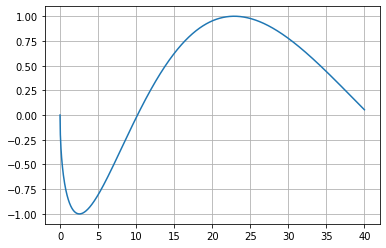

In [119]:
plt.plot(f_vec,fun(f_vec))
plt.grid()

In [121]:
from scipy.optimize import fsolve

In [123]:
sol = fsolve(lambda F: fun(F), 9.5)
sol

array([10.17393454])

In [124]:
(sp.pi**2*210000*sp.pi/64*1**4/(100**2)).evalf()

10.1739345357234